In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data=pd.read_csv('boston_train.csv')

In [5]:
data

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [6]:
data.isnull().sum()

,0
ID,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [7]:
# Handle null values by filling them with the mean of the respective columns
data.fillna(data.mean(), inplace=True)

In [8]:
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


<ipython-input-12-0cca034db7bb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.medv)


<Axes: xlabel='medv', ylabel='Density'>

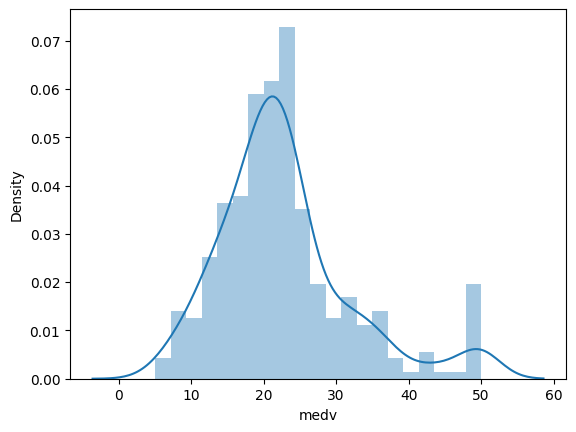

In [12]:
import seaborn as sns
sns.distplot(data.medv)

<Axes: ylabel='medv'>

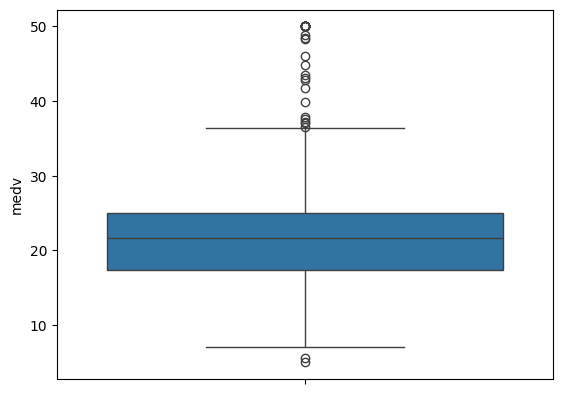

In [14]:
sns.boxplot(data.medv)

In [16]:
correlation = data.corr()
correlation.loc['medv']

,medv
ID,-0.221694
crim,-0.407454
zn,0.344842
indus,-0.473932
chas,0.204390
nox,-0.413054
rm,0.689598
age,-0.358888
dis,0.249422
rad,-0.352251


<Axes: >

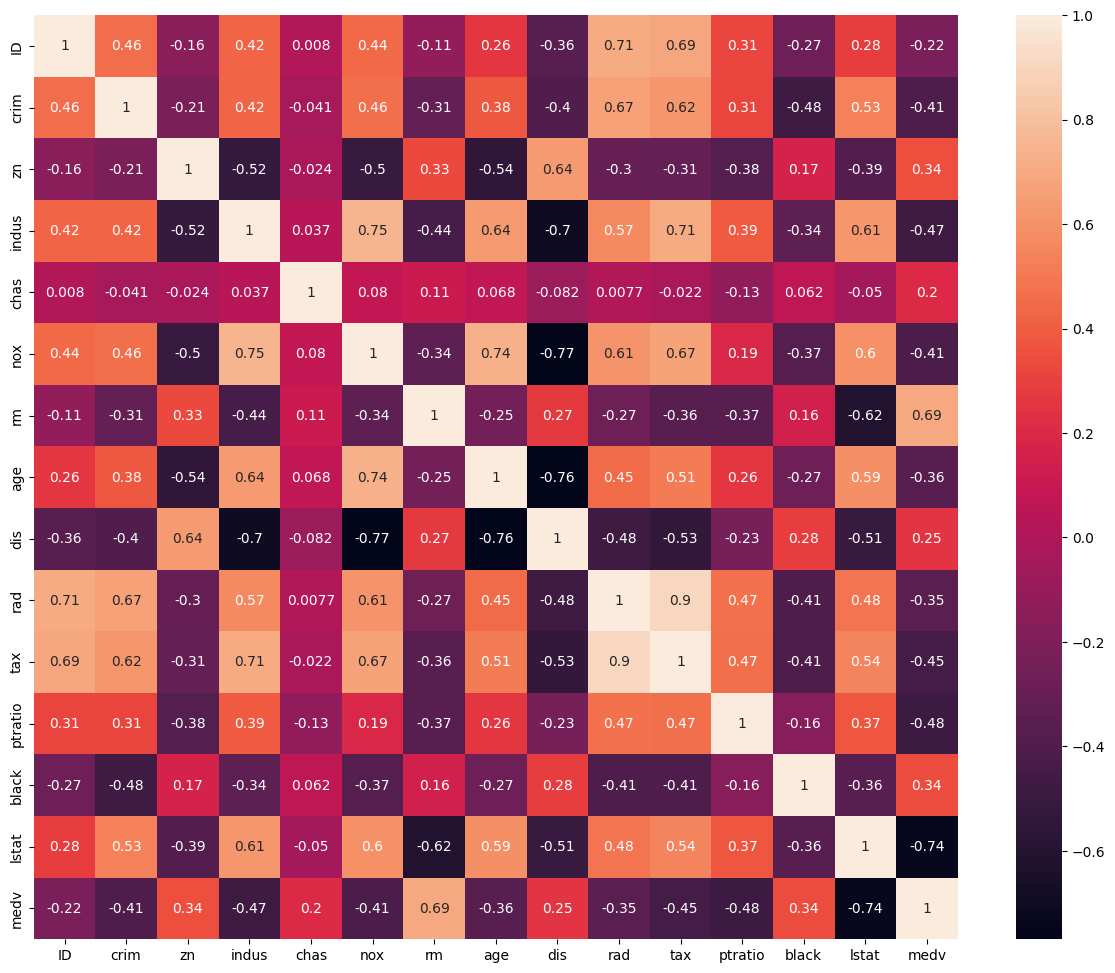

In [17]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

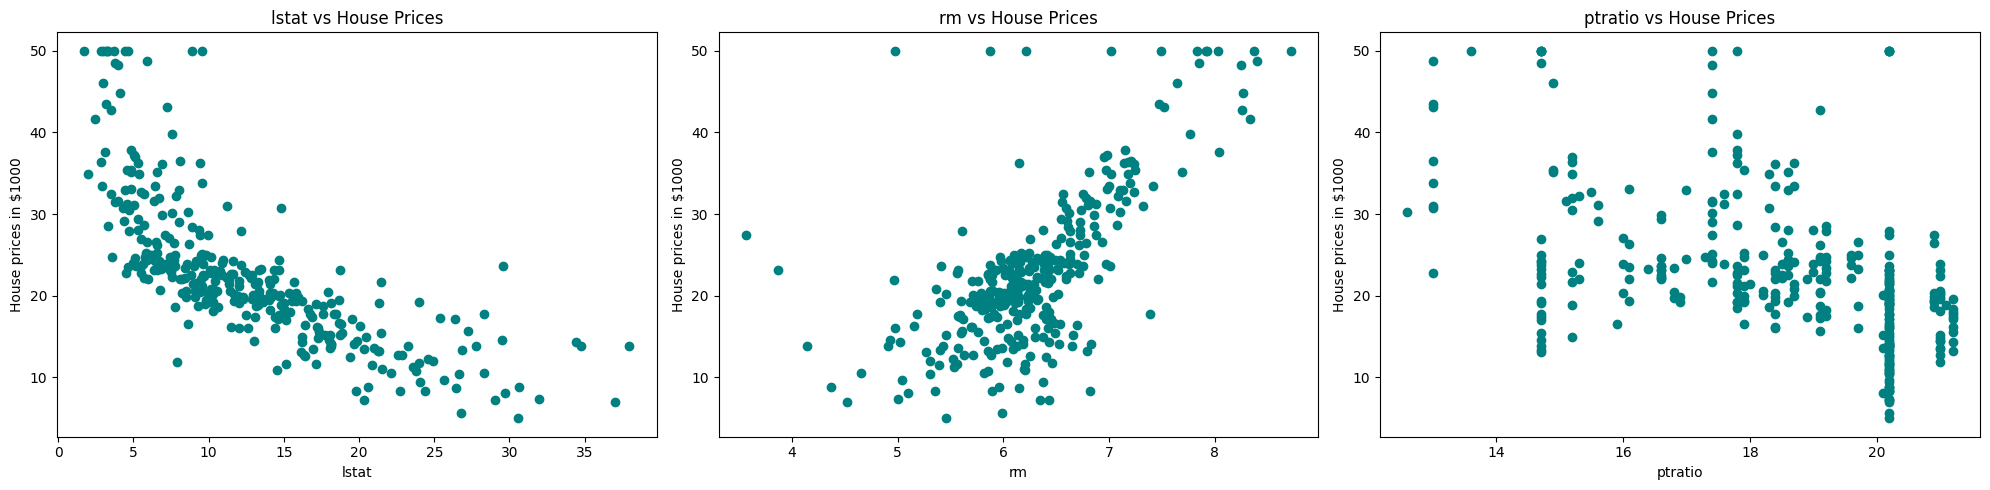

In [22]:
# Checking the scatter plot with the most correlated features
# rm (+0.69) – More rooms = higher price
# lstat (–0.74) – Higher % of low-income residents = lower price
# ptratio (–0.48) – Worse student-teacher ratio = lower price

plt.figure(figsize=(20, 5))
features = ['lstat', 'rm', 'ptratio']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = data[col]
    y = data['medv']
    plt.scatter(x, y, marker='o', color='teal')
    plt.title(f'{col} vs House Prices')
    plt.xlabel(col)
    plt.ylabel('House prices in $1000')

plt.tight_layout()
plt.show()


In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [42]:
# Splitting the dependent feature and independent feature
#X = data[['LSTAT','RM','PTRATIO']]
X = data.iloc[:,:-1]  #Select all columns except the last one
y = data.medv

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Step 5: Normalize (scale) the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Step 6: Build the DNN model for Linear Regression
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer (1 neuron, no activation for regression)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Step 7: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [49]:
# Step 8: Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 621.1745 - mae: 23.4610 - val_loss: 617.5535 - val_mae: 22.6955
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 593.9883 - mae: 22.6437 - val_loss: 583.9880 - val_mae: 21.9731
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 517.1834 - mae: 21.2027 - val_loss: 550.0937 - val_mae: 21.2185
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 496.5643 - mae: 20.7115 - val_loss: 513.3123 - val_mae: 20.3742
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 477.4251 - mae: 20.0514 - val_loss: 471.0109 - val_mae: 19.3730
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 421.6751 - mae: 18.9086 - val_loss: 421.6113 - val_mae: 18.1498
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 371.3718 - mae: 17.8186 - val_loss: 364.5344 - val_mae: 16.6416
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 312.0603 - mae: 16.0286 - val_loss: 302.8933 - val_mae: 14.9400
Epoch 9/100
7/7 ━━━━━━━

In [50]:
# Step 9: Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"\nMean Absolute Error on test data: ${mae * 1000:.2f}")

3/3 - 0s - 40ms/step - loss: 11.5588 - mae: 2.5694

Mean Absolute Error on test data: $2569.44


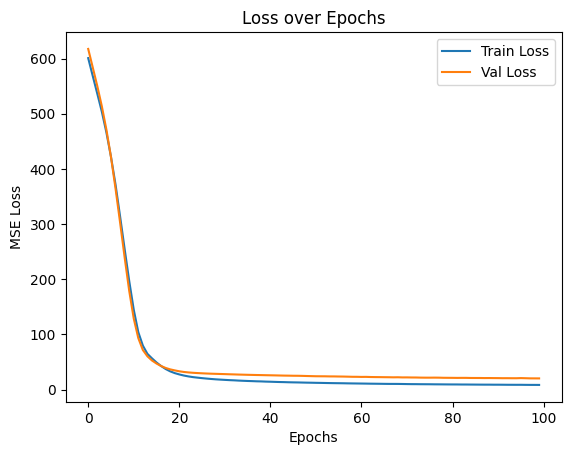

In [51]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [52]:
test_data = pd.read_csv("boston_test.csv")

In [53]:
# Use the same scaler (already fitted on training data)
test_data_scaled = scaler.transform(test_data)

# Predict using the trained model
predictions = model.predict(test_data_scaled)

# Optional: Flatten to a clean array
predicted_prices = predictions.flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [54]:
# Print or preview results
print("Predicted House Prices (in $1000s):")
print(predicted_prices)

# Or show with row index
df_results = pd.DataFrame({
    "Index": test_data.index,
    "Predicted Price ($1000s)": predicted_prices
})
print(df_results.head())

Predicted House Prices (in $1000s):
[31.127691  26.701221  17.635483  17.042656  16.78799   16.85224
 19.736197  16.104837  15.718434  16.104828  17.595278  18.555313
 13.832159  15.8231325 23.396004  22.002647  23.620955  31.801043
 19.004814  27.279922  19.245056  20.783731  20.737612  23.556492
 18.622671  22.12448   24.49215   27.01099   22.400188  28.95782
 41.790306  42.93439   35.589294  21.348215  19.538754  20.76233
 17.640188  16.869137  16.180628  21.759424  16.839733  18.821539
 18.845844  15.89807   14.64181   15.295183  17.111195  17.887455
 19.508873  20.330547  18.246716  32.59864   41.3465    22.376797
 21.854408  23.20356   29.87497   46.98911   39.43685   37.261833
 30.941444  42.275604  15.549473  20.019512  23.156237  24.08061
 21.8505    23.532492  22.043655  26.025602  32.352356  41.334984
 32.540623  31.851315  25.650002  24.28326   17.363392  14.978501
 16.753345  28.85303   23.070211  22.651478  40.105637  53.131844
 37.80468   34.826096  48.54008   25.252872 